In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Distribution of Sample Means ##

In [2]:
united = Table.read_table('united.csv')

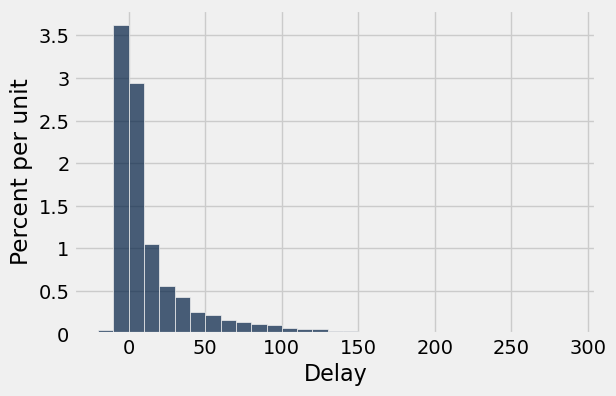

In [3]:
united.hist('Delay', bins = np.arange(-20, 300, 10))

In [4]:
delays = united.column('Delay')
population_mean = np.mean(delays)
population_sd = np.std(delays)

population_mean, population_sd

(16.658155515370705, 39.480199851609314)

In [5]:
def one_sample_mean(sample_size):
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [6]:
def ten_thousand_sample_means(sample_size):
    means = make_array()
    for i in np.arange(10000):
        means = np.append(means, one_sample_mean(sample_size))
    return means

In [7]:
"""Empirical distribution of random sample means"""

def plot_sample_means(sample_size):
    means = ten_thousand_sample_means(sample_size)
    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities
    sample_means.hist(bins = np.arange(0, 41, 0.5))
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(united.column('Delay')))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(united.column('Delay')))
    print("SD of sample means:", np.std(means))

Sample size:  25
Population mean: 16.6581555154
Average of sample means:  16.712268
Population SD: 39.4801998516
SD of sample means: 7.89911864806


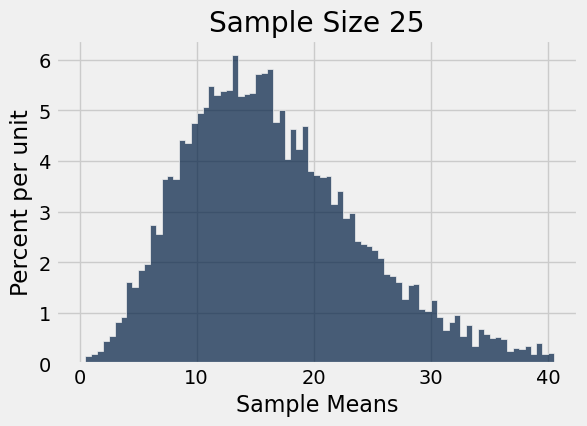

In [8]:
plot_sample_means(25)

Sample size:  100
Population mean: 16.6581555154
Average of sample means:  16.5592
Population SD: 39.4801998516
SD of sample means: 3.89554295831


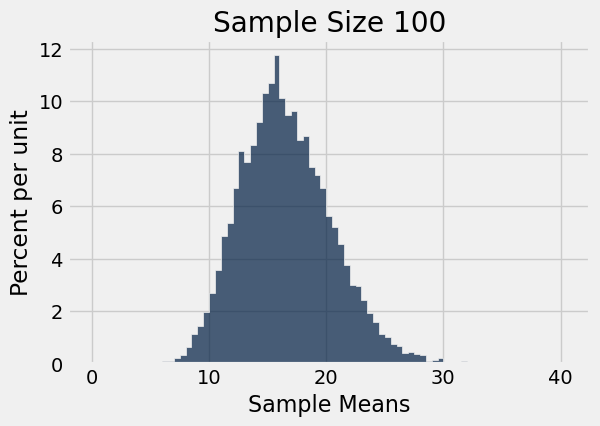

In [10]:
plot_sample_means(100)

Sample size:  400
Population mean: 16.6581555154
Average of sample means:  16.63370075
Population SD: 39.4801998516
SD of sample means: 1.96859685755


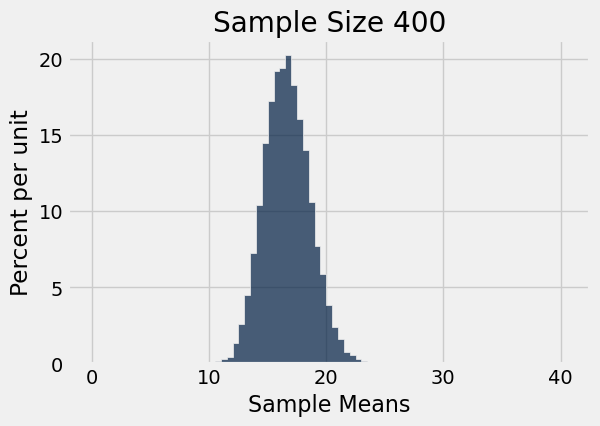

In [11]:
plot_sample_means(400)

Sample size:  900
Population mean: 16.6581555154
Average of sample means:  16.6687017778
Population SD: 39.4801998516
SD of sample means: 1.30733766522


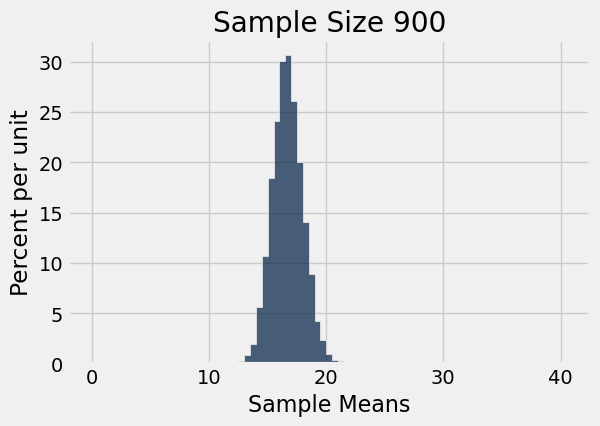

In [13]:
plot_sample_means(900)

## SD of the sample mean

In [ ]:
# Warning: this cell will take a long time to run (a few minutes)!
# Below is an image of the output for this section
# It may be best to run after class

sample_sizes = np.arange(100, 950, 50)

sample_mean_sds = make_array()
for n in sample_sizes:
    sample_means = ten_thousand_sample_means(n)
    sample_mean_sds = np.append(sample_mean_sds, np.std(sample_means))

In [ ]:
sd_table = Table().with_columns(
    'Sample size', sample_sizes,
    'SD of simulated sample means', sample_mean_sds,
    'Pop SD / sqrt(sample size)', population_sd / np.sqrt(sample_sizes),
)
sd_table

In [ ]:
sd_table.scatter('Sample size')

<img src="SD_of_sample_mean_output.png"/> 

## SD of 0/1 Population  - Population Size ##

In [4]:
# Population of size 10

number_of_ones = 4
zero_one_population_10 = np.append(np.ones(number_of_ones), np.zeros(10 - number_of_ones))
zero_one_population_10

array([ 1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

In [5]:
np.std(zero_one_population_10)

0.48989794855663565

In [6]:
# Population of size 100

number_of_ones = 40
zero_one_population_100 = np.append(np.ones(number_of_ones), np.zeros(100 - number_of_ones))
zero_one_population_100

np.std(zero_one_population_100)

0.48989794855663571

In [7]:
# Population of size 1000

number_of_ones = 400
zero_one_population_1000 = np.append(np.ones(number_of_ones), np.zeros(1000 - number_of_ones))
zero_one_population_1000

np.std(zero_one_population_1000)

0.48989794855663565

## SD of 0/1 Population  - Population Proportion ##

In [8]:
# Let's make a graph with proportion of ones on the x axis and SD on the y axis

In [9]:
def sd_of_zero_one_population_100(number_of_ones):
    """SD of a population with num_ones ones and (100 - num_ones) zeros"""
    zero_one_population_100 = np.append(np.ones(number_of_ones), np.zeros(100 - number_of_ones))
    return np.std(zero_one_population_100)

In [10]:
poss_ones = np.arange(101)
zero_one_pop = Table().with_columns(
    'Number of ones', poss_ones,
    'Proportion of ones', poss_ones / 100
)

zero_one_pop 

Number of ones,Proportion of ones
0,0
1,0.01
2,0.02
3,0.03
4,0.04
5,0.05
6,0.06
7,0.07
8,0.08
9,0.09


In [11]:
sds = zero_one_pop.apply(sd_of_zero_one_population_100, 'Number of ones')
zero_one_pop = zero_one_pop.with_column('SD', sds)

zero_one_pop

Number of ones,Proportion of ones,SD
0,0,0
1,0.01,0.0994987
2,0.02,0.14
3,0.03,0.170587
4,0.04,0.195959
5,0.05,0.217945
6,0.06,0.237487
7,0.07,0.255147
8,0.08,0.271293
9,0.09,0.286182


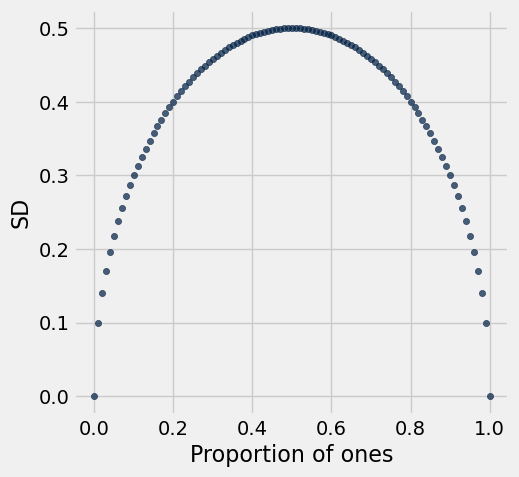

In [12]:
zero_one_pop.scatter('Proportion of ones', 'SD')

## Election Polls ##

In [13]:
poss_num_of_ones = np.arange(300, 308)

Table().with_columns(
    'Possible Cal Votes', poss_num_of_ones,
    'Percentage of Cal Votes', 100 * (poss_num_of_ones / 660)
)

Possible Cal Votes,Percentage of Cal Votes
300,45.4545
301,45.6061
302,45.7576
303,45.9091
304,46.0606
305,46.2121
306,46.3636
307,46.5152


In [14]:
(0.5 / 0.0075) ** 2

4444.444444444445

In [15]:
np.ceil((0.5 / 0.0075) ** 2)

4445.0